In [1]:
import cobra
from cobra.core import Model, Reaction, Metabolite
from cobra.io import read_sbml_model, load_model
from cobra.util.solver import linear_reaction_coefficients
from cobra.flux_analysis import (flux_variability_analysis,
                                 single_gene_deletion, single_reaction_deletion, double_gene_deletion,
                                 double_reaction_deletion)

# %%
# Read yeast model
sbml_fname = 'iMM904.xml'
# Read the model
model = read_sbml_model(sbml_fname)
# %%
# Add a new metabolite to the model
STLE = Metabolite("STLE_c", name="Santalene", formula="C15H24")
STLE.compartment = "cytosol"
model.add_metabolites({STLE})

STLL = Metabolite("STLL_c", name="Santalol", formula="C15H24O")
STLL.compartment = "cytosol"
model.add_metabolites({STLL})
# %%
# Add a new reaction to the model
h = model.metabolites.get_by_id('h_c')
STLE = model.metabolites.get_by_id('STLE_c')
STLL = model.metabolites.get_by_id('STLL_c')
frdp = model.metabolites.get_by_id('frdp_c')
ppi = model.metabolites.get_by_id('ppi_c')
o2 = model.metabolites.get_by_id('o2_c')
nadph = model.metabolites.get_by_id('nadph_c')
h2o = model.metabolites.get_by_id('h2o_c')
nadp = model.metabolites.get_by_id('nadp_c')

STLES = Reaction("STLES")
STLES.add_metabolites({frdp: -1, STLE: 1, ppi: 1})
STLES.gene_reaction_rule = "STLES"

STLLS = Reaction("STLLS")
STLLS.add_metabolites({STLE: -1, o2: -1, nadph: -1, h: -1, STLL: 1, h2o: 1, nadp: 1})
STLLS.gene_reaction_rule = "STLLS"

STLES.bounds = (0, 99999)  # unconstrained
STLLS.bounds = (0, 99999)  # also unconstrained
print(STLES.reaction)
print(STLES.genes)
print(STLLS.reaction)
print(STLLS.genes)
model.add_reactions({STLES})
model.add_reactions({STLLS})
# %%
# create demand reaction
model.add_boundary(model.metabolites.get_by_id("STLL_c"), type="demand")
print("demands", model.demands)
model.reactions.get_by_id('EX_o2_e').lower_bound=-2
model.reactions.get_by_id('EX_glc__D_e').lower_bound=-10
model.reactions.get_by_id('EX_thm_e').lower_bound=-0.5
model.reactions.get_by_id('EX_ribflv_e').lower_bound=-0.5
model.reactions.get_by_id('EX_nac_e').lower_bound=-0.5
model.reactions.get_by_id('EX_pyr_e').lower_bound=-0.5
model.reactions.get_by_id('EX_pnto__R_e').lower_bound=-0.5
model.reactions.get_by_id('EX_4abz_e').lower_bound=-0.5
model.reactions.get_by_id('EX_inost_e').lower_bound=-0.5
model.reactions.get_by_id('EX_ala__L_e').lower_bound=-0.5
model.reactions.get_by_id('EX_arg__L_e').lower_bound=-0.5
model.reactions.get_by_id('EX_asn__L_e').lower_bound=-0.5
model.reactions.get_by_id('EX_asp__L_e').lower_bound=-0.5
model.reactions.get_by_id('EX_cys__L_e').lower_bound=-0.5
model.reactions.get_by_id('EX_gln__L_e').lower_bound=-0.5
model.reactions.get_by_id('EX_glu__L_e').lower_bound=-0.5
model.reactions.get_by_id('EX_gly_e').lower_bound=-0.5
model.reactions.get_by_id('EX_his__L_e').lower_bound=-0.5
model.reactions.get_by_id('EX_ile__L_e').lower_bound=-0.5
model.reactions.get_by_id('EX_leu__L_e').lower_bound=-0.5
model.reactions.get_by_id('EX_lys__L_e').lower_bound=-0.5
model.reactions.get_by_id('EX_met__L_e').lower_bound=-0.5
model.reactions.get_by_id('EX_phe__L_e').lower_bound=-0.5
model.reactions.get_by_id('EX_pro__L_e').lower_bound=-0.5
model.reactions.get_by_id('EX_ser__L_e').lower_bound=-0.5
model.reactions.get_by_id('EX_thr__L_e').lower_bound=-0.5
model.reactions.get_by_id('EX_trp__L_e').lower_bound=-0.5
model.reactions.get_by_id('EX_tyr__L_e').lower_bound=-0.5
model.reactions.get_by_id('EX_val__L_e').lower_bound=-0.5


frdp_c --> STLE_c + ppi_c
frozenset({<Gene STLES at 0x26884d19f10>})
STLE_c + h_c + nadph_c + o2_c --> STLL_c + h2o_c + nadp_c
frozenset({<Gene STLLS at 0x26884d0d610>})
demands [<Reaction DM_STLL_c at 0x26884cf2750>]


In [2]:
# %%
model.objective = 'BIOMASS_SC5_notrace'
print(model.objective.expression)
print(model.objective.direction)
model.optimize()
print(model.summary())
print(model.reactions.get_by_id('GRTT').flux)
print(model.reactions.get_by_id('STLES').flux)
print(model.reactions.get_by_id('STLLS').flux)
print(model.reactions.get_by_id('SQLS').flux)
print(model.reactions.get_by_id('BIOMASS_SC5_notrace').flux)
print(model.reactions.get_by_id('BIOMASS_SC5_notrace').bounds)

1.0*BIOMASS_SC5_notrace - 1.0*BIOMASS_SC5_notrace_reverse_93090
max
Objective
1.0 BIOMASS_SC5_notrace = 0.34745527210553206

Uptake
------
Metabolite    Reaction     Flux  C-Number C-Flux
  arg__L_e EX_arg__L_e  0.05584         6  0.42%
  asn__L_e EX_asn__L_e      0.5         4  2.51%
  asp__L_e EX_asp__L_e      0.5         4  2.51%
  glc__D_e EX_glc__D_e       10         6 75.35%
  gln__L_e EX_gln__L_e      0.5         5  3.14%
  glu__L_e EX_glu__L_e      0.5         5  3.14%
       h_e      EX_h_e    2.372         0  0.00%
  his__L_e EX_his__L_e  0.02304         6  0.17%
   inost_e  EX_inost_e 0.001842         6  0.01%
  leu__L_e EX_leu__L_e    0.103         6  0.78%
  lys__L_e EX_lys__L_e  0.09944         6  0.75%
  met__L_e EX_met__L_e  0.02411         5  0.15%
      o2_e     EX_o2_e        2         0  0.00%
  phe__L_e EX_phe__L_e  0.04652         9  0.53%
      pi_e     EX_pi_e  0.06869         0  0.00%
  pro__L_e EX_pro__L_e      0.5         5  3.14%
     pyr_e    EX_pyr_e      

In [4]:
# %%
# Assumption santalol production reduces biomass by 10%
# The most optimal STLL production when yeast growth is not compromised
model.reactions.get_by_id('BIOMASS_SC5_notrace').bounds = (0.31271, 99999)
model.reactions.get_by_id('BIOMASS_SC5_notrace').objective_coefficient = 0
model.reactions.get_by_id('STLLS').objective_coefficient = 1
model.reactions.get_by_id('STLLS').bounds = (0, 99999)

model.optimize()
print(model.summary())
print(model.reactions.get_by_id('GRTT').flux)
print(model.reactions.get_by_id('FRDPtm').flux)
print(model.reactions.get_by_id('FRTT').flux)
print(model.reactions.get_by_id('SQLS').flux)
print(model.reactions.get_by_id('STLLS').flux)
print(model.reactions.get_by_id('BIOMASS_SC5_notrace').flux)

Objective
1.0 STLLS = 0.14731839257339926

Uptake
------
Metabolite    Reaction      Flux  C-Number C-Flux
  arg__L_e EX_arg__L_e   0.05025         6  0.39%
  asn__L_e EX_asn__L_e       0.5         4  2.58%
  asp__L_e EX_asp__L_e       0.5         4  2.58%
  glc__D_e EX_glc__D_e        10         6 77.48%
  gln__L_e EX_gln__L_e       0.5         5  3.23%
  glu__L_e EX_glu__L_e       0.5         5  3.23%
       h_e      EX_h_e     1.342         0  0.00%
  his__L_e EX_his__L_e   0.02073         6  0.16%
  ile__L_e EX_ile__L_e   0.06026         6  0.47%
   inost_e  EX_inost_e  0.001657         6  0.01%
  leu__L_e EX_leu__L_e   0.09269         6  0.72%
  lys__L_e EX_lys__L_e    0.0895         6  0.69%
  met__L_e EX_met__L_e    0.0217         5  0.14%
      o2_e     EX_o2_e         2         0  0.00%
  phe__L_e EX_phe__L_e   0.04187         9  0.49%
      pi_e     EX_pi_e   0.06182         0  0.00%
  pro__L_e EX_pro__L_e    0.0515         5  0.33%
     pyr_e    EX_pyr_e       0.5         3 

In [12]:

# %%
# Add constraints from ERG9-mediated reaction

# Change min for SQLS
model.reactions.get_by_id('SQLS').bounds = (0, 99999)
model.reactions.get_by_id('BIOMASS_SC5_notrace').bounds = (0.31271, 99999)
model.reactions.get_by_id('STLLS').objective_coefficient = 1
# start from here
import numpy as np

# Get to the point when BSBS=0 flux #assumption about max
a = np.linspace(0.000687962, 0.08, num=10)
print(a)
b = []
c = []
d = []
e = []
f = []
for num in range(len(a)):

    model.reactions.get_by_id('SQLS').bounds = (a[num], 99999)
    model.optimize()
    b.append(model.reactions.get_by_id('GRTT').flux)
    c.append(model.reactions.get_by_id('STLES').flux)
    d.append(model.reactions.get_by_id('STLLS').flux)
    e.append(model.reactions.get_by_id('FRDPtm').flux)
    f.append(model.reactions.get_by_id('FRTT').flux)
print(b)
print(c)
print(d)
print(e)
print(f)

# %%
import matplotlib.pyplot as plt

[0.00068796 0.00950041 0.01831286 0.02712531 0.03593776 0.04475021
 0.05356265 0.0623751  0.07118755 0.08      ]
[0.14869431657339294, 0.150028311096329, 0.15136230561926464, 0.15269630014220034, 0.15403029466513596, 0.15536428918807202, 0.15669828371100802, 0.1580322782339433, 0.15936627275687937, 0.160700267279815]
[0.14731839257339296, 0.13102748976299566, 0.11473658695259797, 0.09844568414220034, 0.08215478133180265, 0.06586387852140535, 0.04957297571100805, 0.03328207290060998, 0.016991170090212688, 0.0007002672798150286]
[0.14731839257339296, 0.13102748976299566, 0.11473658695259797, 0.09844568414220034, 0.08215478133180264, 0.06586387852140535, 0.04957297571100805, 0.03328207290060998, 0.016991170090212684, 0.0007002672798150286]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


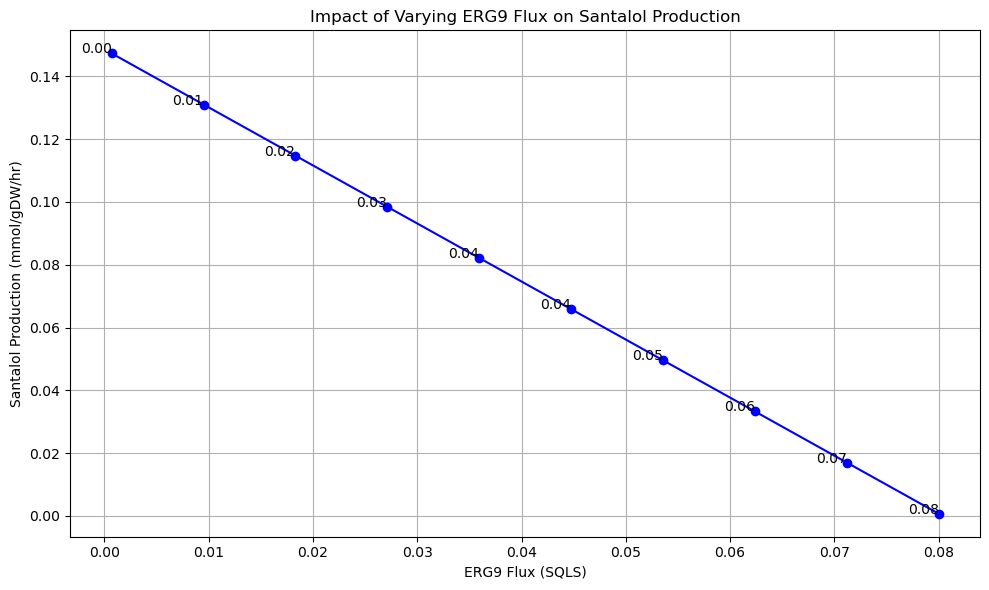

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(a, d, '-o', color='blue')
plt.title('Impact of Varying ERG9 Flux on Santalol Production')
plt.xlabel('ERG9 Flux (SQLS)')
plt.ylabel('Santalol Production (mmol/gDW/hr)')

# Annotate each point with its value
for i, j in zip(a, d):
    plt.text(i, j, f"{i:.2f}", ha='right')
plt.grid(True)
plt.tight_layout()
plt.savefig('ERG9_santalol.png')
plt.show()

In [15]:
from sklearn.linear_model import LinearRegression
a1=np.array(a).reshape((-1, 1))
c1=np.array(d).reshape((-1, 1))
lm = LinearRegression().fit(a1, c1)
print(lm.score(a1, c1))
print(lm.intercept_)
print(lm.coef_)

1.0
[0.14859018]
[[-1.84862385]]


In [ ]:


plt.xlim(xmin=0.000, xmax=0.060)
plt.ylim(ymin=0.000, ymax=0.140)
plt.xlabel("ERG9 Flux")
plt.ylabel("Santalol Flux")
plt.plot(a[0], d[0], marker='o', mfc='#1F77B4', mec='#1F77B4')
plt.plot(a[9], d[9], marker='o', mfc='#1F77B4', mec='#1F77B4')
plt.plot(a, d, c='#1F77B4')

plt.savefig('STLL_vs_ERG9_linear.png')
from sklearn.linear_model import LinearRegression
a1 = np.array(a).reshape((-1, 1))
d1 = np.array(c).reshape((-1, 1))
lm = LinearRegression().fit(a1, d1)
print(lm.score(a1, d1))
print(lm.intercept_)
print(lm.coef_)
plt.cla()
plt.clf()

# %%


def dataframe_acquisition_amino_acid(rxn_name):
    model.reactions.get_by_id('EX_glu__L_e').bounds = (-0.5, 99999)
    model.reactions.get_by_id('EX_gln__L_e').bounds = (-0.5, 99999)
    model.reactions.get_by_id('EX_asp__L_e').bounds = (-0.5, 99999)
    model.reactions.get_by_id('EX_asn__L_e').bounds = (-0.5, 99999)
    model.reactions.get_by_id('EX_ser__L_e').bounds = (-0.5, 99999)
    model.reactions.get_by_id('EX_thr__L_e').bounds = (-0.5, 99999)
    model.reactions.get_by_id('BIOMASS_SC5_notrace').bounds = (0, 99999)
    model.reactions.get_by_id('EX_glc__D_e').bounds = (-10, 99999)
    model.reactions.get_by_id('SQLS').bounds = (0, 99999)
    model.objective = 'BIOMASS_SC5_notrace'
    model.optimize()

    # Assess growth rate under different asn uptake
    growthrate_asn = []
    asn_uptake = np.linspace(-0.5, -5, num=10)
    for num in range(len(asn_uptake)):
        model.reactions.get_by_id(rxn_name).bounds = (asn_uptake[num], 99999)
        model.optimize()
        growthrate_asn.append(model.reactions.get_by_id('BIOMASS_SC5_notrace').flux)
    print(growthrate_asn)
    growth_rate_asn_90 = [x * 0.9 for x in growthrate_asn]

    # Assess max bisabolene production under different asn uptake
    model.reactions.get_by_id(rxn_name).bounds = (-0.5, 99999)
    model.objective = 'STLLS'
    asn_SQLS_flux_90 = []
    asn_GRTT_flux_90 = []
    for num in range(len(asn_uptake)):
        model.reactions.get_by_id('BIOMASS_SC5_notrace').bounds=(growth_rate_asn_90[num],99999)
        model.reactions.get_by_id(rxn_name).bounds=(asn_uptake[num],99999)
        model.optimize()
        asn_SQLS_flux_90.append(model.reactions.get_by_id('SQLS').flux)
        asn_GRTT_flux_90.append(model.reactions.get_by_id('GRTT').flux)

    # Reset and change objective function
    model.reactions.get_by_id('BIOMASS_SC5_notrace').bounds = (0, 99999)
    model.reactions.get_by_id(rxn_name).bounds = (0, 99999)
    model.reactions.get_by_id('SQLS').bounds = (0, 99999)

    df_santalol = []

    model.objective = 'STLLS'
    for num in range(len(asn_uptake)):
        model.reactions.get_by_id('BIOMASS_SC5_notrace').bounds = (growth_rate_asn_90[num], 99999)
        model.reactions.get_by_id(rxn_name).bounds = (asn_uptake[num], 99999)
        sqls_flux = np.linspace(asn_SQLS_flux_90[num], (asn_GRTT_flux_90[num]*0.4544), num=11)
        list_santalol = []
        for j in range(len(sqls_flux)):
            model.reactions.get_by_id('SQLS').bounds = (sqls_flux[j], 99999)
            model.optimize()
            list_santalol.append(model.reactions.get_by_id('STLLS').flux)

        df_santalol.append(list_santalol)
    return df_santalol

#%%


asp = dataframe_acquisition_amino_acid('EX_asp__L_e')
asn = dataframe_acquisition_amino_acid('EX_asn__L_e')
glu = dataframe_acquisition_amino_acid('EX_glu__L_e')
gln = dataframe_acquisition_amino_acid('EX_gln__L_e')
ser = dataframe_acquisition_amino_acid('EX_ser__L_e')
thr = dataframe_acquisition_amino_acid('EX_thr__L_e')

#%%


import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
def plotting_and_lm(df,name):
    santalol_df = pd.DataFrame(df, index=['0.5', '1', '1.5', '2', '2.5', '3', '3.5', '4', '4.5', '5'], columns=['max', '90%', '80%', '70%', '60%', '50%', '40%', '30%', '20%', '10%', 'min'])
    print(santalol_df)
    x = np.linspace(0.5, 5, num=10)
    x1 = np.array(x).reshape((-1, 1))
    slope = []
    plt.xlim(xmin=0.4, xmax=5)
    plt.ylim(ymin=0.0, ymax=0.2)
    for num in range(10):
        plt.plot(x, santalol_df.iloc[:, num])
        lm = LinearRegression().fit(x1, np.array(santalol_df.iloc[:, num]).reshape((-1, 1)))
        slope.append(lm.coef_)
    plt.savefig(f'plot_{name}.png')
    # Show the plot
    plt.show()
    print(slope)
    return slope

#%%


a1 = plotting_and_lm(asp, 'asp')
a2 = plotting_and_lm(asn, 'asn')
a3 = plotting_and_lm(glu, 'glu')
a4 = plotting_and_lm(gln, 'gln')
a5 = plotting_and_lm(ser, 'ser')
a6 = plotting_and_lm(thr, 'thr')

#%%


# Growth rate under different gln flux
model.reactions.get_by_id('EX_gln__L_e').bounds = (-0.5, 99999)
model.reactions.get_by_id('EX_asp__L_e').bounds = (-0.5, 99999)
model.reactions.get_by_id('EX_asn__L_e').bounds = (-0.5, 99999)
model.reactions.get_by_id('EX_ser__L_e').bounds = (-0.5, 99999)
model.reactions.get_by_id('EX_thr__L_e').bounds = (-0.5, 99999)
model.reactions.get_by_id('BIOMASS_SC5_notrace').bounds = (0, 99999)
model.reactions.get_by_id('EX_glc__D_e').bounds = (-10, 99999)
model.reactions.get_by_id('SQLS').bounds = (0, 99999)
model.objective = 'BIOMASS_SC5_notrace'
model.optimize()

# Assess growth rate under different gln uptake
growthrate_gln = []
gln_uptake = np.linspace(-0.5, -5, num=10)

for num in range(len(gln_uptake)):
    model.reactions.get_by_id('EX_gln__L_e').bounds = (gln_uptake[num], 99999)
    model.optimize()
    growthrate_gln.append(model.reactions.get_by_id('BIOMASS_SC5_notrace').flux)
print(growthrate_gln)
growth_rate_gln_90 = [x * 0.9 for x in growthrate_gln]

# Assess max santalol production under different gln uptake

model.objective = 'STLLS'
gln_SQLS_flux_90 = []
gln_GRTT_flux_90 = []
for num in range(len(gln_uptake)):
    model.reactions.get_by_id('BIOMASS_SC5_notrace').bounds = (growth_rate_gln_90[num], 99999)
    model.reactions.get_by_id('EX_gln__L_e').bounds = (gln_uptake[num], 99999)
    model.optimize()
    gln_SQLS_flux_90.append(model.reactions.get_by_id('SQLS').flux)
    gln_GRTT_flux_90.append(model.reactions.get_by_id('GRTT').flux)

# Reset and change objective function
model.reactions.get_by_id('BIOMASS_SC5_notrace').bounds = (0, 99999)
model.reactions.get_by_id('EX_gln__L_e').bounds = (0, 99999)
model.reactions.get_by_id('SQLS').bounds = (0, 99999)
print(growth_rate_gln_90)

df_santalol = []
df_fpp = []
model.objective = 'STLLS'
for num in range(len(gln_uptake)):
    model.reactions.get_by_id('BIOMASS_SC5_notrace').bounds = (growth_rate_gln_90[num], 99999)
    model.reactions.get_by_id('EX_gln__L_e').bounds = (gln_uptake[num], 99999)
    sqls_flux = np.linspace(gln_SQLS_flux_90[num], (gln_GRTT_flux_90[num] * 0.4544), num=11)
    list_santalol = []
    list_fpp = []
    for j in range(len(sqls_flux)):
        model.reactions.get_by_id('SQLS').bounds = (sqls_flux[j], 99999)
        model.optimize()
        list_santalol.append(model.reactions.get_by_id('STLLS').flux)
        list_fpp.append(model.reactions.get_by_id('GRTT').flux)
    df_santalol.append(list_santalol)
    df_fpp.append(list_fpp)

#%%


gln_santalol_df = pd.DataFrame(df_santalol, columns=['max','90%','80%','70%','60%','50%','40%','30%','20%','10%','min'], index=['0.5','1','1.5','2','2.5','3','3.5','4','4.5','5'])
gln_fpp_df = pd.DataFrame(df_fpp, columns=['max','90%','80%','70%','60%','50%','40%','30%','20%','10%','min'], index=['0.5','1','1.5','2','2.5','3','3.5','4','4.5','5'])

x = np.linspace(0.5, 5, num=10)
x1 = np.array(x).reshape((-1, 1))
slope = []
for num in range(10):
    plt.plot(x,gln_santalol_df.iloc[:,num])
    lm = LinearRegression().fit(x1, np.array(gln_santalol_df.iloc[:, num]).reshape((-1, 1)))
    slope.append(lm.coef_)
# Show the plot
plt.xlim(xmin=0.0)
plt.ylim(ymin=0.0)
plt.show()

slope_fpp = []
for num in range(10):
    plt.plot(x, gln_fpp_df.iloc[:, num])
    lm = LinearRegression().fit(x1, np.array(gln_fpp_df.iloc[:, num]).reshape((-1, 1)))
    slope_fpp.append(lm.coef_)
plt.xlim(xmin=0.0)
plt.ylim(ymin=0.1)
# Show the plot
plt.savefig('FPP_vs_Gln.png')
plt.show()


print(slope)
print(slope_fpp)
